# Ensemble Learning and Random Forest

---
## Table of Content

* [Introduction](#Introduction)
* [Types of Ensemble Methods](#Methods)
     - [BAGGing, or Bootstrap AGGregating](#Bagging)
     - [Random Forest Models](#Random)
* [Advantages and Disadvantages of Ensemble](#AD)
     - [Advantages](#Advantages)
     - [Disadvantages](#Disadvantages)
* [Summary](#summary)
* [Implement](#implement)
* [Application on Data set](#code)

---

## Introduction<a class="anchor" id="Introduction"></a >

Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.

When making Decision Trees, there are several factors we must take into consideration: On what features do we make our decisions on? What is the threshold for classifying each question into a yes or no answer? In the first Decision Tree, what if we wanted to ask ourselves if we had friends to play with or not. If we have friends, we will play every time. If not, we might continue to ask ourselves questions about the weather. By adding an additional question, we hope to greater define the Yes and No classes.

This is where Ensemble Methods come in handy! Rather than just relying on one Decision Tree and hoping we made the right decision at each split, Ensemble Methods allow us to take a sample of Decision Trees into account, calculate which features to use or questions to ask at each split, and make a final predictor based on the aggregated results of the sampled Decision Trees.

---
## Types of Ensemble Methods<a class="anchor" id="Methods"></a >

#### BAGGing, or Bootstrap AGGregating.<a class="anchor" id="Bagging"></a >

BAGGing gets its name because it combines Bootstrapping and Aggregation to form one ensemble model. Given a sample of data, multiple bootstrapped subsamples are pulled. A Decision Tree is formed on each of the bootstrapped subsamples. After each subsample Decision Tree has been formed, an algorithm is used to aggregate over the Decision Trees to form the most efficient predictor. The image below will help explain:

![image](https://miro.medium.com/max/1400/0*PBGJw23ud8Sp7qO4.)

#### Random Forest Models. <a class="anchor" id="Random"></a >

Random Forest Models can be thought of as BAGGing, with a slight tweak. When deciding where to split and how to make decisions, BAGGed Decision Trees have the full disposal of features to choose from. Therefore, although the bootstrapped samples may be slightly different, the data is largely going to break off at the same features throughout each model. In contrary, Random Forest models decide where to split based on a random selection of features. Rather than splitting at similar features at each node throughout, Random Forest models implement a level of differentiation because each tree will split based on different features. This level of differentiation provides a greater ensemble to aggregate over, ergo producing a more accurate predictor. Refer to the image for a better understanding.

![image](https://miro.medium.com/max/1400/0*XJx4UK_LVNTx0aaI.)

Similar to BAGGing, bootstrapped subsamples are pulled from a larger dataset. A decision tree is formed on each subsample. **HOWEVER**, the decision tree is split on different features (in this diagram the features are represented by shapes).

---
## Advantages and Disadvantages of Ensemble <a class="anchor" id="AD"></a >

### Advantages of ensemble methods<a class="anchor" id="Advantages"></a >

* Intuitively, ensembles allow the different needs of a difficult problem to be handled by hypotheses suited to those particular needs.

* Mathematically, ensembles provide an extra degree of freedom in the classical bias/variance tradeoff, allowing solutions that would be difficult (if not impossible) to reach with only a single hypothesis.

* They’re unlikely to overfit.

### Disadvantages of ensemble methods<a class="anchor" id="Disadvantages"></a >

* The model that is closest to the true data generating process will always be best and will beat most ensemble methods. So if the data come from a linear process, linear models will be much superior to ensemble models.

* Ensemble models suffer from lack of interpretability. Sometimes we need predictions and explanations of the predictions. It is hard to convince people to act on predictions when the methods are too complex for their comfort level. Variable importance analysis can help with insights, but if the ensemble is more accurate than a linear additive model, the ensemble is probably exploiting some non-linear and interaction effects that the variable importance analysis can’t completely account for.

* Ensemble methods are usually computationally expensive. Therefore, they add learning time and memory constrains to the problem.

---
### In Summary<a class="anchor" id="Summary"></a >

The goal of any machine learning problem is to find a single model that will best predict our wanted outcome. Rather than making one model and hoping this model is the best/most accurate predictor we can make, ensemble methods take a myriad of models into account, and average those models to produce one final model. 

---

## Implement<a class="anchor" id="implement"></a >

In the following notebook, I will use ensemble learning algorithms for species classification using the Penguin dataset. The three ensemble learning models will be used:

* Random forest 

* Multiple decision trees will be constructed using bagging strategy.

* Multiple MLP will be constructed using bagging strategy.


---
## Application on Data set<a class="anchor" id="code"></a >

In this part, We will compare the performances of the individual models and the ensemble model.


### Data preprocessing

* Classification




In [11]:
## import necessary packages

# Import necessary libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

# Import the tool form sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


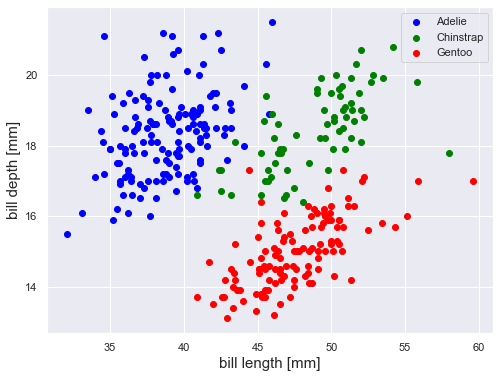

In [3]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# # Extract out labels, and convert labels to numpy array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap","Gentoo"]
colors = ["blue", "green","red"]

fig, ax = plt.subplots(figsize = (8, 6))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

From the scatter plot above, "bill_length_mm" and "bill_depth_mm", can separate the three pinguin species well. And thus, I will use these two features as predictors. And we can see that there is a clear distinction between the three species.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size = 0.4,
                                                   random_state = 42)

### Bagging

In this part, multiple decision trees will be constructed using bagging strategy.

To achieve, we use the tools, BaggingClassifier and DecisionTreeClassifier in sklearn.

In [23]:
# Set up the ensemble model
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [24]:
# Train the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [26]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
print("The accuracy of the bagging on the testing set is",accuracy_score(y_test, y_pred))

The accuracy of the bagging on the testing set is 0.8880597014925373


### Random Forest

In this part, multiple decision trees will be constructed using Random Forest.

We will use the classifier provided by sklearn, RandomForestClassifier.

In [27]:
# Train the training set
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
# Predict the test data and calculate the accuracy
y_pred = clf.predict(X_test)
print("The accuracy of the random forest on the testing set is",accuracy_score(y_test, y_pred))

The accuracy of the random forest on the testing set is 0.9328358208955224


### Individual Decision Tree

In [30]:
# Set up the decision tree and train the training set
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
# Predict the test data and calculate the accuracy
y_pred = dt_clf.predict(X_test)
print("The accuracy of the individual decision tree on the testing set is",accuracy_score(y_test, y_pred))

The accuracy of the individual decision tree on the testing set is 0.9029850746268657


---

## Conclusion

In this case, the ensemble learning model performs better than the individual algorithms when we use Random Forest. **However**, this is not always the case. In the meantime, the ensemble learning model needs more computational space and time to implement.